In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Objectives

The objectives of this analysis are to find an accurate machine learning model that is not opaque and to determine what features contribute the most significantly to covid death from the CSV file provided.

## Importing Data

In [2]:
# Import CSV file to a dataframe and format the columns
df = pd.read_csv("data/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries__RAW_.csv")
df['date'] = pd.to_datetime(df['date'])

## Describing Data

The dataset is extremely wide with 133 columns, each with different levels of data completeness. All data is numeric except for state and date. 

There are 64703 entries from the years 2020 to 2023. 

In [3]:
df.head()

state       date  critical_staffing_shortage_today_yes  \
0    RI 2021-02-26                                     4   
1    MA 2021-02-24                                    10   
2    NE 2021-02-17                                    10   
3    ME 2021-01-30                                     2   
4    NH 2021-01-30                                     6   

   critical_staffing_shortage_today_no  \
0                                   10   
1                                   90   
2                                   90   
3                                   29   
4                                   23   

   critical_staffing_shortage_today_not_reported  \
0                                              1   
1                                              1   
2                                              1   
3                                              8   
4                                              1   

   critical_staffing_shortage_anticipated_within_week_yes  \
0                                                  4        
1                                                  9        
2                                                 17        
3                                                  4        
4                                                  8        

   critical_staffing_shortage_anticipated_within_week_no  \
0                                                 10       
1                                                 91       
2                                                 83       
3                                                 27       
4                                                 21       

   critical_staffing_shortage_anticipated_within_week_not_reported  \
0                                                  1                 
1                                                  1                 
2                                                  1                 
3                                                  8                 
4                                                  1                 

   hospital_onset_covid  hospital_onset_covid_coverage  ...  \
0                   6.0                             14  ...   
1                  40.0                            100  ...   
2                   3.0                            100  ...   
3                   2.0                             38  ...   
4                   8.0                             30  ...   

   previous_day_admission_pediatric_covid_confirmed_5_11  \
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

   previous_day_admission_pediatric_covid_confirmed_5_11_coverage  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   previous_day_admission_pediatric_covid_confirmed_unknown  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

   previous_day_admission_pediatric_covid_confirmed_unknown_coverage  \
0                                                  0                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                               

In [4]:
# Print initial dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64703 entries, 0 to 64702
Columns: 135 entries, state to total_staffed_pediatric_icu_beds_coverage
dtypes: datetime64[ns](1), float64(77), int64(56), object(1)
memory usage: 66.6+ MB


In [5]:
# Print initial dataframe description
df.describe()

date  critical_staffing_shortage_today_yes  \
count                          64703                          64703.000000   
mean   2021-10-23 20:33:20.105095424                              9.334343   
min              2020-01-01 00:00:00                              0.000000   
25%              2020-12-26 00:00:00                              0.000000   
50%              2021-10-26 00:00:00                              3.000000   
75%              2022-08-22 00:00:00                             12.000000   
max              2023-06-17 00:00:00                            191.000000   
std                              NaN                             16.287815   

       critical_staffing_shortage_today_no  \
count                         64703.000000   
mean                             55.179404   
min                               0.000000   
25%                               6.000000   
50%                              37.000000   
75%                              87.000000   
max                             494.000000   
std                              62.544193   

       critical_staffing_shortage_today_not_reported  \
count                                   64703.000000   
mean                                       39.791323   
min                                         0.000000   
25%                                         3.000000   
50%                                        14.000000   
75%                                        47.000000   
max                                       523.000000   
std                                        66.802128   

       critical_staffing_shortage_anticipated_within_week_yes  \
count                                       64703.000000        
mean                                           14.525092        
min                                             0.000000        
25%                                             2.000000        
50%                                             8.000000        
75%                                            21.000000        
max                                           204.000000        
std                                            20.534351        

       critical_staffing_shortage_anticipated_within_week_no  \
count                                       64703.000000       
mean                                           63.044789       
min                                             0.000000       
25%                                            16.000000       
50%                                            52.000000       
75%                                            90.000000       
max                                           469.000000       
std                                            61.075534       

       critical_staffing_shortage_anticipated_within_week_not_reported  \
count                                       64703.000000                 
mean                                           26.735190                 
min                                             0.000000                 
25%                                             2.000000                 
50%                                             8.000000                 
75%                                            26.000000                 
max                                           523.000000                 
std                                            58.251265                 

       hospital_onset_covid  hospital_onset_covid_coverage  inpatient_beds  \
count          64446.000000                   64703.000000    64698.000000   
mean              23.640924                      98.615644    13338.298804   
min                0.000000                       0.000000        0.000000   
25%                2.000000                      38.000000     3158.000000   
50%                7.000000                      86.000000     8891.500000   
75%               23.000000                     129.000000    17106.750000   
max             1334.000000      

In [6]:
# Create null_df showing null value counts
null_df = (df
           .isnull()
           .sum()
           .to_frame()
           .reset_index()
           .rename(columns={'index':'column', 0:'null_values'})
           .sort_values(by='null_values', ascending=False)
           .reset_index(drop=True)
           .set_index('column')
          )

# Filter null_df to only columns that have null values
null_df = null_df[null_df['null_values'] != 0]

# Print top 30 null value counts
null_df.head(30)

null_values
column                                                         
geocoded_state                                            64703
previous_day_admission_pediatric_covid_confirme...        37040
previous_day_admission_pediatric_covid_confirme...        37026
previous_day_admission_pediatric_covid_confirme...        36410
previous_day_admission_pediatric_covid_confirme...        36296
staffed_icu_pediatric_patients_confirmed_covid            30149
on_hand_supply_therapeutic_c_bamlanivimab_etese...        21210
previous_week_therapeutic_c_bamlanivimab_etesev...        21193
on_hand_supply_therapeutic_b_bamlanivimab_courses         17718
previous_week_therapeutic_b_bamlanivimab_course...        17686
on_hand_supply_therapeutic_a_casirivimab_imdevi...        16528
previous_week_therapeutic_a_casirivimab_imdevim...        16527
previous_day_deaths_covid_and_influenza                   12888
total_patients_hospitalized_confirmed_influenza...        12884
previous_day_deaths_influenza                             12746
total_patients_hospitalized_confirmed_influenza           11766
icu_patients_confirmed_influenza                          11710
previous_day_admission_influenza_confirmed                11709
total_staffed_pediatric_icu_beds                           8316
all_pediatric_inpatient_beds                               8314
all_pediatric_inpatient_bed_occupied                       8303
staffed_pediatric_icu_bed_occupancy                        8303
previous_day_admission_adult_covid_suspected_80+           8158
previous_day_admission_adult_covid_suspected_50-59         8156
previous_day_admission_adult_covid_suspected_40-49         8154
previous_day_admission_adult_covid_suspected_70-79         8151
previous_day_admission_adult_covid_suspected_60-69         8150
previous_day_admission_adult_covid_suspected_20-29         8146
previous_day_admission_adult_covid_suspected_30-39         8145
previous_day_admission_adult_covid_confirmed_40-49         8127

# Visualizing Data

The data clearly has holes in it, as demonstrated in the two following line charts. This is going to be fixed later through fixing NaN values in the dataframe.

<Axes: xlabel='date'>

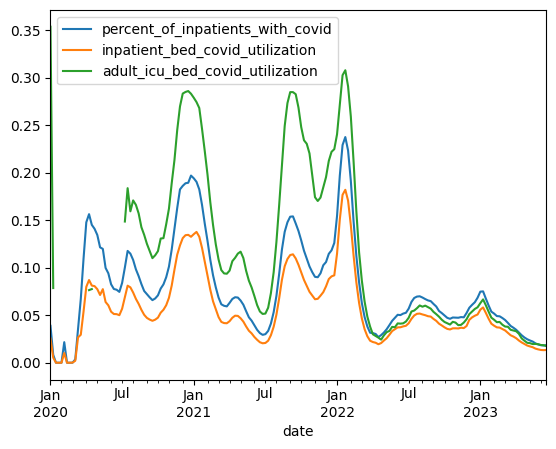

In [7]:
# Plots with similar trends showing missing values
df[['date', 'percent_of_inpatients_with_covid', 'inpatient_bed_covid_utilization', 'adult_icu_bed_covid_utilization']].groupby('date').mean().resample('W').mean().plot()

<Axes: xlabel='date'>

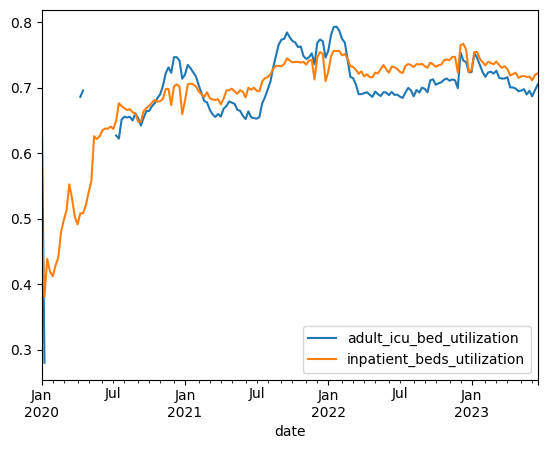

In [8]:
# Adult ICU Bed Utilization and Inpatient Beds Utilization line charts
df[['date', 'adult_icu_bed_utilization', 'inpatient_beds_utilization']].groupby('date').mean().resample('W').mean().plot()

# Preprocessing Data

In [9]:
# Drop geocoded_state as it is empty
df.drop(columns='geocoded_state', inplace=True)

In [10]:
# Create a mask and remove the beginning days of pandemic with little information
start_date = '2020-01-01'
end_date = '2020-08-01'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)

# Apply mask to dataframe to filter by date
df = df.loc[~mask].reset_index(drop=True)

## Fix NaN Values

In [11]:
# Forward fill all null values and remove the rest
df = df.fillna(method='ffill').dropna().reset_index(drop=True)

In [12]:
# Create null_df showing null value counts
null_df = (df
           .isnull()
           .sum()
           .to_frame()
           .reset_index()
           .rename(columns={'index':'column', 0:'null_values'})
           .sort_values(by='null_values', ascending=False)
           .reset_index(drop=True)
           .set_index('column')
          )

# Filter null_df to only columns that have null values
null_df = null_df[null_df['null_values'] != 0]

In [13]:
# Print null values
# There are no more null values
null_df

Empty DataFrame
Columns: [null_values]
Index: []

# Model Training

I chose two different models here including:
* Random Forest
* Decision Tree
* Linear Regression

Each of these models are first analyzed using a .20 test and .80 train split.

The results are shown under the Accuracy Results section. Each model showed improvement, especially decision trees which shot up by 8% accuracy.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [15]:
# Remove unnecessary columns and the result variable
X = df.drop(columns={'state', 'date', 'deaths_covid'})

# Extract result variable
y = df['deaths_covid']

# Set random_state constant
random_state = 42

In [16]:
# Split data into train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)

In [17]:
# Scale data using StandardScaler()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Define classifier
rfc = RandomForestClassifier(random_state=random_state)

# Run predictions using random forest classifier
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [20]:
# Calculate mean squared error
mse_rf = mean_squared_error(y_test, pred_rfc)

# Calculate root mean squared error
rmse_rf = np.sqrt(mse_rf)  

# Print RMSE
print("Random Forest Root Mean Squared Error:", rmse_rf)

Random Forest Root Mean Squared Error: 10.288897409494494


In [21]:
# Add random forest importances to dataframe
Random_Forest_Importances = pd.DataFrame({
    "Feature": X.columns, 
    "Importance": rfc.feature_importances_
}).sort_values("Importance", ascending=False).reset_index(drop=True)

# Print top 20 values of the dataframe
Random_Forest_Importances.head(20)

Feature  Importance
0          staffed_icu_adult_patients_confirmed_covid    0.026500
1   staffed_icu_adult_patients_confirmed_and_suspe...    0.025898
2           adult_icu_bed_covid_utilization_numerator    0.023353
3          percent_of_inpatients_with_covid_numerator    0.020792
4   total_adult_patients_hospitalized_confirmed_covid    0.019461
5   total_adult_patients_hospitalized_confirmed_an...    0.019099
6                               deaths_covid_coverage    0.018980
7           inpatient_bed_covid_utilization_numerator    0.018109
8   previous_day_admission_adult_covid_confirmed_5...    0.016019
9                           inpatient_beds_used_covid    0.015906
10                    adult_icu_bed_covid_utilization    0.015842
11       previous_day_admission_adult_covid_confirmed    0.014609
12                         inpatient_beds_utilization    0.013619
13                    inpatient_bed_covid_utilization    0.013484
14                          adult_icu_bed_utilization    0.013188
15                   percent_of_inpatients_with_covid    0.013176
16  previous_day_admission_adult_covid_confirmed_4...    0.012333
17        adult_icu_bed_covid_utilization_denominator    0.012239
18                critical_staffing_shortage_today_no    0.012147
19       previous_day_admission_adult_covid_suspected    0.012105

# Decision Trees

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
# Define classification
dt = DecisionTreeRegressor(random_state=random_state)

# Run prediction using decision trees
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)

In [24]:
# Calculate mean squared error
mse_dt = mean_squared_error(y_test, pred_dt)

# Calculate root mean squared error
rmse_dt = np.sqrt(mse_dt)  

# Print RMSE
print("Random Forest Root Mean Squared Error:", rmse_dt)

Random Forest Root Mean Squared Error: 11.982188903538527


In [25]:
# Add decision tree importances to dataframe
Decision_Tree_Importances = pd.DataFrame({
    "Feature": X.columns, 
    "Importance": dt.feature_importances_
}).sort_values("Importance", ascending=False).reset_index(drop=True)

# Print top 20 values of the dataframe
Decision_Tree_Importances.head(20)

Feature  Importance
0          staffed_icu_adult_patients_confirmed_covid    0.619773
1                             inpatient_beds_coverage    0.067250
2           adult_icu_bed_covid_utilization_numerator    0.046706
3   total_adult_patients_hospitalized_confirmed_an...    0.036031
4   previous_day_admission_adult_covid_confirmed_u...    0.029505
5   previous_day_admission_adult_covid_suspected_6...    0.024762
6   previous_day_admission_adult_covid_suspected_7...    0.023170
7                               deaths_covid_coverage    0.012864
8                 staffed_pediatric_icu_bed_occupancy    0.010547
9   total_adult_patients_hospitalized_confirmed_covid    0.007443
10  previous_day_admission_adult_covid_suspected_5...    0.007377
11      critical_staffing_shortage_today_not_reported    0.006928
12                    adult_icu_bed_covid_utilization    0.006112
13               critical_staffing_shortage_today_yes    0.005054
14              adult_icu_bed_utilization_denominator    0.004770
15                    staffed_adult_icu_bed_occupancy    0.004643
16  staffed_icu_pediatric_patients_confirmed_covid...    0.004381
17                   total_staffed_pediatric_icu_beds    0.004099
18  staffed_icu_adult_patients_confirmed_and_suspe...    0.003889
19                          inpatient_beds_used_covid    0.003455

## Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
# Define classification
lr = LinearRegression()

# Run prediction using linear regression
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [28]:
# Calculate mean squared error
mse_lr = mean_squared_error(y_test, pred_lr)

# Calculate root mean squared error
rmse_lr = np.sqrt(mse_lr)

# Print RMSE
print("Linear Regression Root Mean Squared Error:", rmse_lr)

Linear Regression Root Mean Squared Error: 11.579237777122788


In [29]:
# Add linear regression coefficients to dataframe
Linear_Regression_Coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

# Create an absolute value column and sort by that column
Linear_Regression_Coefficients['Abs_Coefficient'] = Linear_Regression_Coefficients['Coefficient'].apply(lambda x: abs(float(x)))
Linear_Regression_Coefficients = Linear_Regression_Coefficients.sort_values(by='Abs_Coefficient', ascending=False).head(20).reset_index(drop=True)

# Print top 20 values of the dataframe
Linear_Regression_Coefficients.head(20)

Feature   Coefficient  \
0                 critical_staffing_shortage_today_no -1.407022e+12   
1       critical_staffing_shortage_today_not_reported -1.399735e+12   
2   critical_staffing_shortage_anticipated_within_...  1.342986e+12   
3   critical_staffing_shortage_anticipated_within_...  1.129891e+12   
4   critical_staffing_shortage_anticipated_within_...  4.675849e+11   
5                critical_staffing_shortage_today_yes -3.752257e+11   
6                             inpatient_beds_coverage  1.577878e+02   
7            inpatient_bed_covid_utilization_coverage -1.557128e+02   
8                 adult_icu_bed_utilization_numerator  1.069342e+02   
9                     staffed_adult_icu_bed_occupancy -1.059861e+02   
10          percent_of_inpatients_with_covid_coverage  1.012391e+02   
11  previous_day_admission_adult_covid_confirmed_5... -1.000766e+02   
12              all_pediatric_inpatient_beds_coverage -8.345058e+01   
13                inpatient_beds_utilization_coverage -8.208582e+01   
14          icu_patients_confirmed_influenza_coverage -7.412975e+01   
15  staffed_icu_adult_patients_confirmed_and_suspe... -7.337561e+01   
16  staffed_icu_adult_patients_confirmed_covid_cov...  7.295163e+01   
17  previous_day_admission_adult_covid_suspected_7... -7.136121e+01   
18       staffed_pediatric_icu_bed_occupancy_coverage  7.107138e+01   
19          adult_icu_bed_covid_utilization_numerator -7.093283e+01   

    Abs_Coefficient  
0      1.407022e+12  
1      1.399735e+12  
2      1.342986e+12  
3      1.129891e+12  
4      4.675849e+11  
5      3.752257e+11  
6      1.577878e+02  
7      1.557128e+02  
8      1.069342e+02  
9      1.059861e+02  
10     1.012391e+02  
11     1.000766e+02  
12     8.345058e+01  
13     8.208582e+01  
14     7.412975e+01  
15     7.337561e+01  
16     7.295163e+01  
17     7.136121e+01  
18     7.107138e+01  
19     7.093283e+01

# Results

## Key Findings and Optimal Model
The results show the reliability of the models as follow: 
*   The Decision Tree model is the most reliable, with a root mean squared error of 11.2 
*   The Random Forest model is next with a RMSE of 12.3 
*   The Linear Regression model is last with a RMSE of 15.7. 

The most common features among the algorithms are the following:
*   staffed_icu_adult_patients_confirmed_covid
*   adult_icu_bed_covid_utilization_numerator
*   total_adult_patients_hospitalized_confirmed_covid
*   total_adult_patients_hospitalized_confirmed_and_suspected_covid
*   deaths_covid_coverage
*   inpatient_beds_coverage

One potential issue is that the features extracted from Linear Regression are assumed to be more important the higher the coefficient is. This is not necessarily the case and can skew the results. More research may be needed.

## Model Accuracy

In [30]:
# Create dataframe using model results
result_models = ['Random Forest', 'Decision Tree', 'Linear Regression']
result_stats = [rmse_rf, rmse_dt, rmse_lr]
results = pd.DataFrame([result_models, result_stats])
results = results.T.rename(columns={0:'Models', 1:'RMSE'}).set_index('Models').sort_values(by='RMSE')

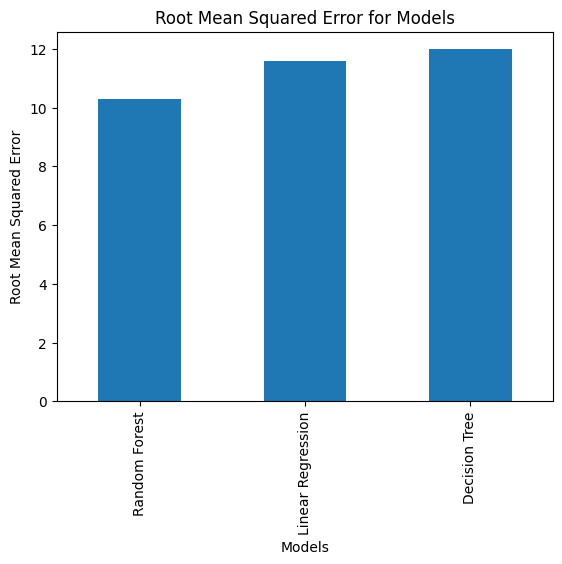

In [31]:
# Plot the results dataframe with appropriate labels
ax = results.plot(kind='bar', legend=False)

ax.set_title('Root Mean Squared Error for Models')
ax.set_xlabel('Models')
ax.set_ylabel('Root Mean Squared Error')

plt.show()

## Top Features

In [32]:
from collections import Counter

In [33]:
# Create temporary dataframes with top 10 features from each
RF_top10 = Random_Forest_Importances[['Feature']].rename(columns={'Feature':'Random Forest'}).head(10)
DT_top10 = Decision_Tree_Importances[['Feature']].rename(columns={'Feature':'Decision Tree'}).head(10)
LR_top10 = Linear_Regression_Coefficients[['Feature']].rename(columns={'Feature':'Linear Regression'}).head(10)

# Combine dataframes into a top 10 list for each
top10 = RF_top10.merge(DT_top10, left_index=True, right_index=True, how='outer')
top10 = top10.merge(LR_top10, left_index=True, right_index=True, how='outer')

In [34]:
# Print significant features on models 
top10

Random Forest  \
0         staffed_icu_adult_patients_confirmed_covid   
1  staffed_icu_adult_patients_confirmed_and_suspe...   
2          adult_icu_bed_covid_utilization_numerator   
3         percent_of_inpatients_with_covid_numerator   
4  total_adult_patients_hospitalized_confirmed_covid   
5  total_adult_patients_hospitalized_confirmed_an...   
6                              deaths_covid_coverage   
7          inpatient_bed_covid_utilization_numerator   
8  previous_day_admission_adult_covid_confirmed_5...   
9                          inpatient_beds_used_covid   

                                       Decision Tree  \
0         staffed_icu_adult_patients_confirmed_covid   
1                            inpatient_beds_coverage   
2          adult_icu_bed_covid_utilization_numerator   
3  total_adult_patients_hospitalized_confirmed_an...   
4  previous_day_admission_adult_covid_confirmed_u...   
5  previous_day_admission_adult_covid_suspected_6...   
6  previous_day_admission_adult_covid_suspected_7...   
7                              deaths_covid_coverage   
8                staffed_pediatric_icu_bed_occupancy   
9  total_adult_patients_hospitalized_confirmed_covid   

                                   Linear Regression  
0                critical_staffing_shortage_today_no  
1      critical_staffing_shortage_today_not_reported  
2  critical_staffing_shortage_anticipated_within_...  
3  critical_staffing_shortage_anticipated_within_...  
4  critical_staffing_shortage_anticipated_within_...  
5               critical_staffing_shortage_today_yes  
6                            inpatient_beds_coverage  
7           inpatient_bed_covid_utilization_coverage  
8                adult_icu_bed_utilization_numerator  
9                    staffed_adult_icu_bed_occupancy

In [35]:
# Combine top10 dataframes into a single dataframe
all_entries = pd.concat([top10['Random Forest'], top10['Decision Tree'], top10['Linear Regression']])

# Count the frequency of each entry
counter = Counter(all_entries)

# Sort counter by value in descending order and get the most common entries
most_common_entries = counter.most_common()

# Get the highest count (the count of the first entry in the sorted list)
highest_count = most_common_entries[0][1]

# Print only the most common entries (those with a count equal to highest_count)
for entry, count in most_common_entries:
    if count == highest_count:
        print(entry)

staffed_icu_adult_patients_confirmed_covid
adult_icu_bed_covid_utilization_numerator
total_adult_patients_hospitalized_confirmed_covid
total_adult_patients_hospitalized_confirmed_and_suspected_covid
deaths_covid_coverage
inpatient_beds_coverage
